In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [99]:
df = pd.read_csv("loan_prediction.csv")

In [100]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [102]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [104]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

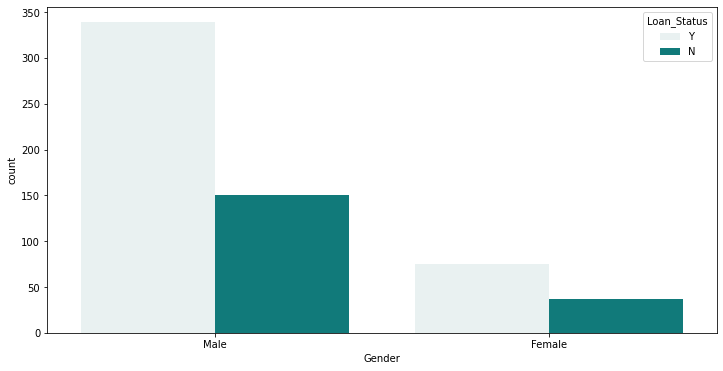

In [105]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Gender' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')


Above is the countPlots for data
    And in the data we can clearly observe that Male are getting more loan than Female

<AxesSubplot:xlabel='Married', ylabel='count'>

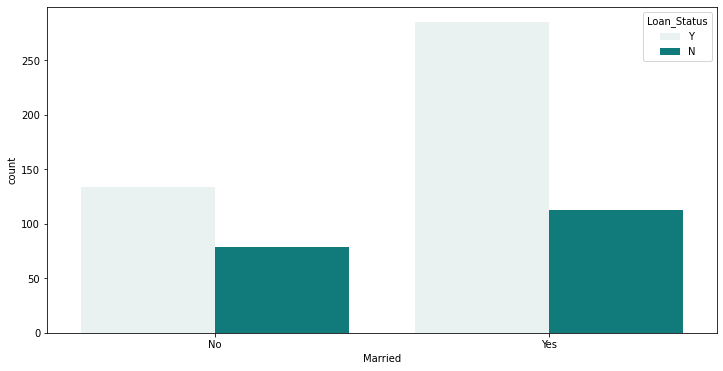

In [106]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Married' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

From above data we can Clearly observe that Married has more chance to geting loan than Unmarried

<AxesSubplot:xlabel='Dependents', ylabel='count'>

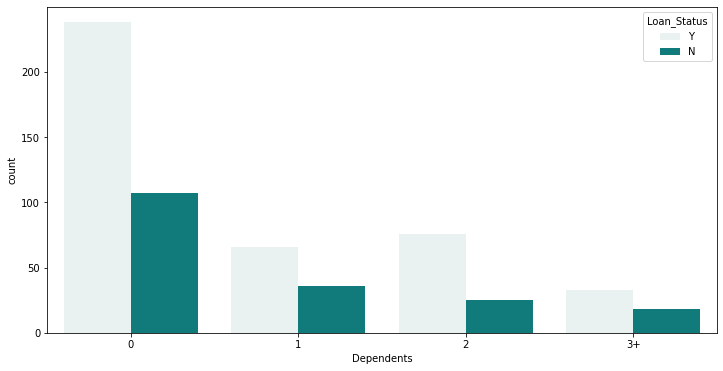

In [107]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Dependents' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

From above plot one can clearly observe that Dependents are more chance to getting loan. Like if someone is 0 dependents then they have the highest chance to getting loan

<AxesSubplot:xlabel='Education', ylabel='count'>

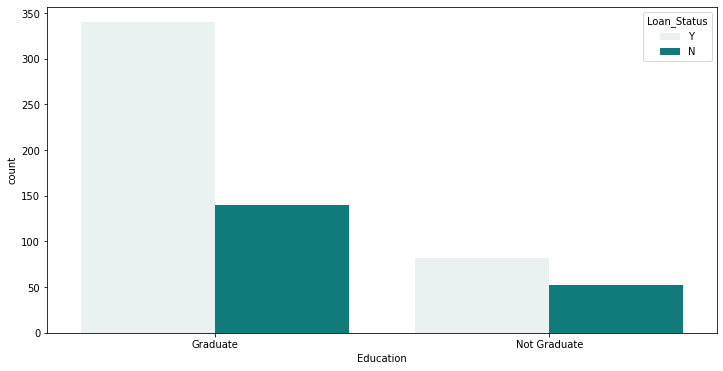

In [108]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Education' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

From above plot we can absorb that graduate have the highest chance to geting loan 

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

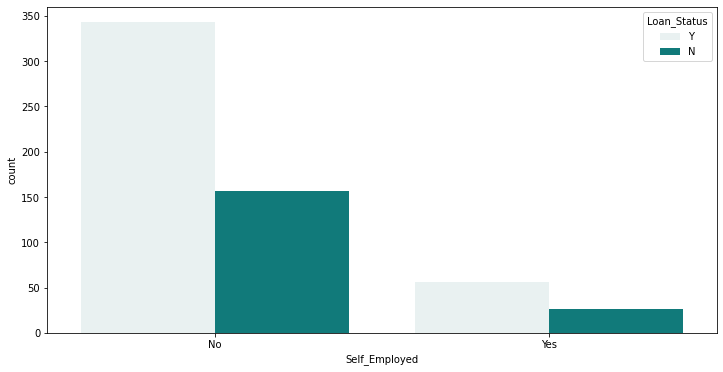

In [109]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Self_Employed' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

From above we can observe that if someone's is self-employed he/she has the less chance of getting a Loan as compared to Not Self-Employed.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

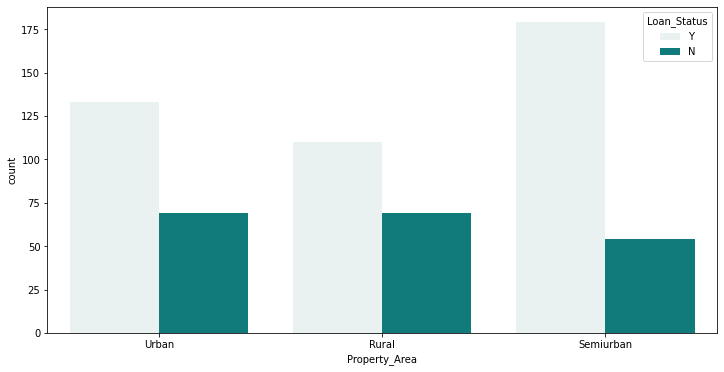

In [110]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Property_Area' , hue = 'Loan_Status' , data = df , dodge = True , color = 'darkcyan')

From above we can observe that getting Loan according to Property_Area Semiurban has the highest chance to get loan than the Urban area and lesser chance in the Rular properties area.

# Data Preprocessing

Finding features which are of integer datatype.

In [111]:
int_type = [feature for feature in df.columns if df[feature].dtypes !='O']
print(int_type)
print("Number of columns with integer data type in df is :" , len(int_type))

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Number of columns with integer data type in df is : 5


Finding datas which are of Object datatype.

In [112]:
object_type = [feature for feature in df.columns if df[feature].dtypes =='O']
print(object_type)
print("Number of columns with object data type in df is :" , len(object_type))

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Number of columns with object data type in df is : 8


In [113]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Finding percentage of Null Values for each feature.

In [114]:
for col in df:
    percentage = np.round((df[col].isnull().sum()/614)*100,2)
    print(col,':' , percentage,'%')

Loan_ID : 0.0 %
Gender : 2.12 %
Married : 0.49 %
Dependents : 2.44 %
Education : 0.0 %
Self_Employed : 5.21 %
ApplicantIncome : 0.0 %
CoapplicantIncome : 0.0 %
LoanAmount : 3.58 %
Loan_Amount_Term : 2.28 %
Credit_History : 8.14 %
Property_Area : 0.0 %
Loan_Status : 0.0 %


From above one can observe that Gender , Married , Dependents , Self_Employed , LoanAmount , Loan_Amount_Term , Credit_History has some percentages of outliers . So we need to deal with them .

# Gender

In [115]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Here majority is Male so we will replace Null values with Male



In [116]:
df['Gender'] = df['Gender'].fillna('Male')

In [117]:
df['Gender'].value_counts()


Male      502
Female    112
Name: Gender, dtype: int64

Married



In [118]:
df['Married'].value_counts()


Yes    398
No     213
Name: Married, dtype: int64

Here majority is 'Yes' so we will replace the Null with 'Yes'.



In [119]:
df['Married'] = df['Married'].fillna('Yes')


In [120]:
df['Married'].value_counts()


Yes    401
No     213
Name: Married, dtype: int64

Dependent

In [121]:
df['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [122]:
df['Dependents'].isnull().sum()


15

Here the majority of people have 0 dependents , so we will replace the null values with 0 dependents .



In [123]:
df.Dependents = df['Dependents'].fillna('O')


In [124]:
df['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
O      15
Name: Dependents, dtype: int64

Self_Employed



In [125]:
df['Self_Employed'].value_counts()


No     500
Yes     82
Name: Self_Employed, dtype: int64

From above we can observe that majoritry of the values are 'No' so we will replace the Null with 'No'.



In [126]:
df.Self_Employed = df['Self_Employed'].fillna('No')


In [127]:
df['Self_Employed'].value_counts()


No     532
Yes     82
Name: Self_Employed, dtype: int64

LoanAmount



In [128]:
df['LoanAmount'].isnull().sum()


22

In [129]:
df['LoanAmount'].value_counts()


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In LoanAmount we will replace the Null values with mean.



In [130]:
df.LoanAmount = df['LoanAmount'].fillna((df.LoanAmount.mean()))


In [131]:
df['LoanAmount'].isnull().sum()


0

Loan_Amount_Term



In [132]:
df['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [133]:
df['Loan_Amount_Term'].isnull().sum()


14

In [134]:
df['Loan_Amount_Term'].dtype


dtype('float64')

Here majority of Loan_Amount_Term has a value of 360.0 , So we will replace the Null values wit 360.0 only ,



In [135]:
df.Loan_Amount_Term = df['Loan_Amount_Term'].fillna(360.0)


In [136]:
df['Loan_Amount_Term'].isnull().sum()


0

Credit_History



In [137]:
df['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [138]:
df['Credit_History'].isnull().sum()


50

Here majority has 1.0 Credit_History so we will replace Null with 1.0.



In [139]:
df.Credit_History = df['Credit_History'].fillna(1.0)

In [140]:
df['Credit_History'].isnull().sum()

0

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We have successfully dealt with all the Null values .


Categorical Features


Now we need to deal with our categorical features.

We are using Label_Encoder to encode our categorical features.

LabelEncoder converts categorical features to a meaningful number.


In [142]:
cat_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])


In [143]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [144]:
object_type = [feature for feature in df.columns if df[feature].dtypes =='O']
print(object_type)
print("Number of columns with object data type in adf is :" , len(object_type))

['Loan_ID']
Number of columns with object data type in adf is : 1


From above we can observe that we have successully encoded all our categorical features , there's only one feature left that is Loan_ID , so we wiil drop this as it is just an indexing , and will not constitute much in our future predictions.


In [145]:
df = df.drop('Loan_ID' , axis = 1)


In [146]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


Checking for Outliers

Visualising Outliers

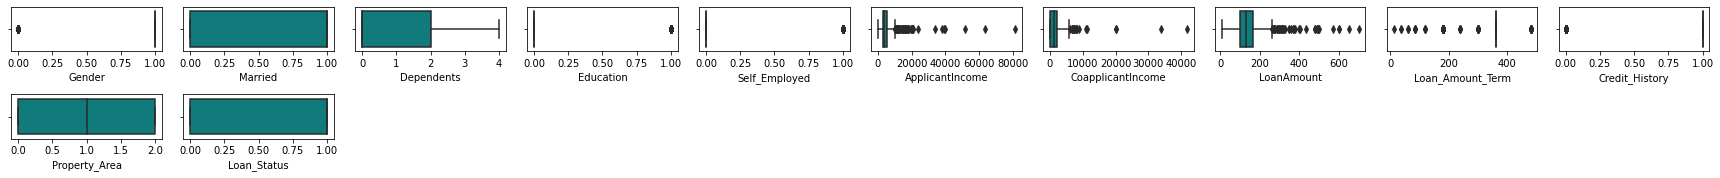

In [147]:
collist=df.columns.values
ncol=10
nrows=20
plt.figure(figsize=(24,24))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='darkcyan',orient="Y")
    plt.tight_layout()


From above we can observe that there are Outliers in our dataset , so we need to deal with them .

Finding ZScore

A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean.

In [148]:
z_score = np.abs(zscore(df))


In [149]:
print(np.where(z_score>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


From above arrays we can observe that first array shows row number and second array shows column number of values having Zscore > 3.

In [150]:
print(np.where(z_score>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [151]:
df.shape

(614, 12)

We will Successfully  remove outliers from our data.

df_wo = DataFrame without Outliers .

In [152]:
df_wo  = df.drop([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604])


In [153]:
df_wo.shape

(577, 12)

In [154]:
df_wo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    int32  
 1   Married            577 non-null    int32  
 2   Dependents         577 non-null    int32  
 3   Education          577 non-null    int32  
 4   Self_Employed      577 non-null    int32  
 5   ApplicantIncome    577 non-null    int64  
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    int32  
 11  Loan_Status        577 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 42.8 KB


We have successfully removed all the outliers

Correlation

Visualizing Correlation between our predictor variable and target variable .

PLotting a Correlation Heatmap to visualise the correlation between our dataset.

<AxesSubplot:>

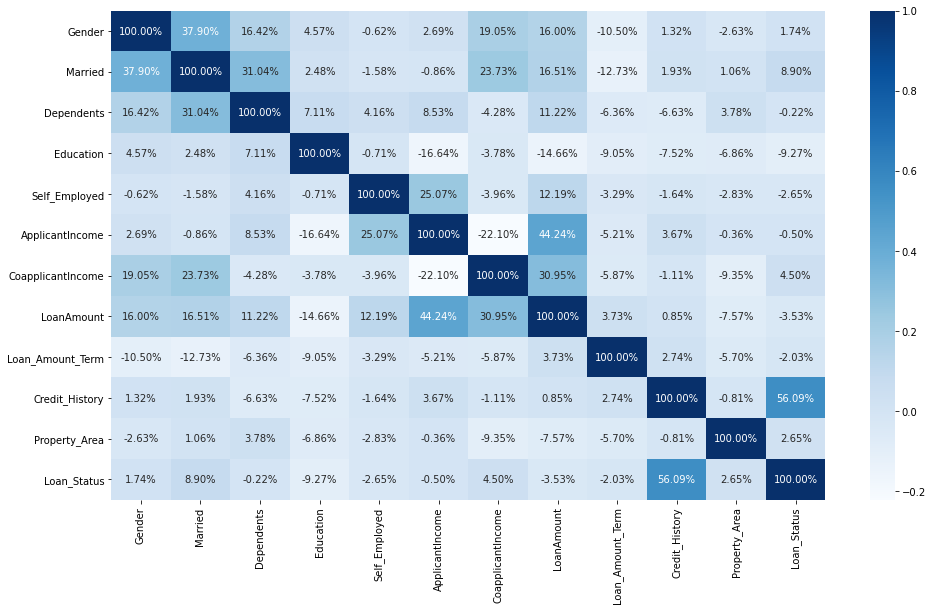

In [155]:
plt.figure(figsize= (16,9))
sns.heatmap(df_wo.corr() , annot = True , fmt = '.2%' , cmap = 'Blues')

In [156]:
corr_df = df_wo.corr()
corr_df  = corr_df.iloc[: , -1 :]
corr_df

,Loan_Status
Gender,0.017408
Married,0.089026
Dependents,-0.002160
Education,-0.092658
Self_Employed,-0.026525
ApplicantIncome,-0.005003
CoapplicantIncome,0.045009
LoanAmount,-0.035289
Loan_Amount_Term,-0.020291
Credit_History,0.560936


From above we can observe that our predictor variables are not very much correlated with each other , so we will not require PCA for this.

Skewness

Checking for skewness in our dataset if theres any .

In [157]:
x_predictor = df_wo.drop('Loan_Status', axis = 1)
x_predictor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [158]:
x_predictor.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.134133
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

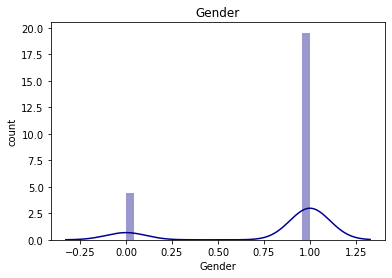

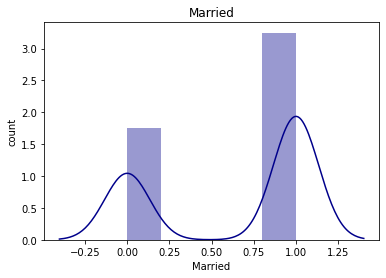

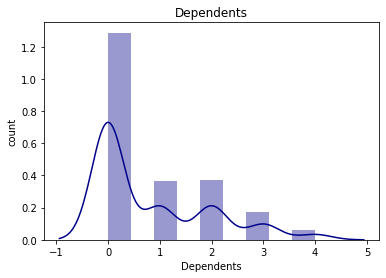

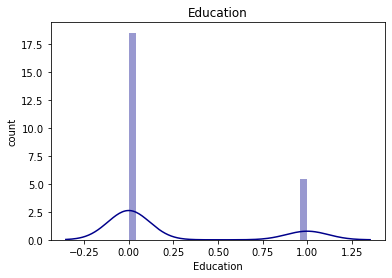

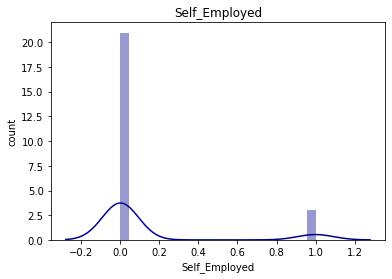

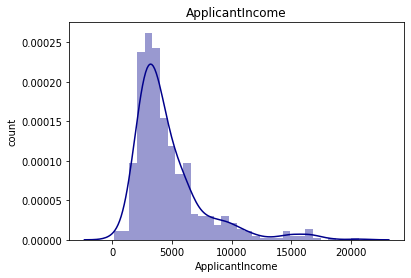

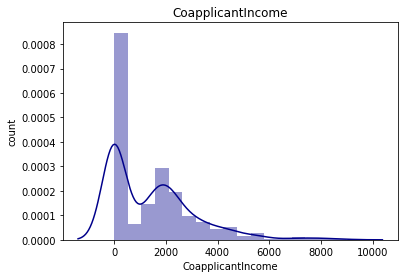

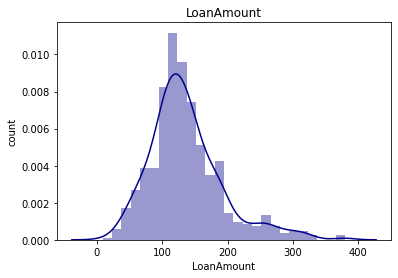

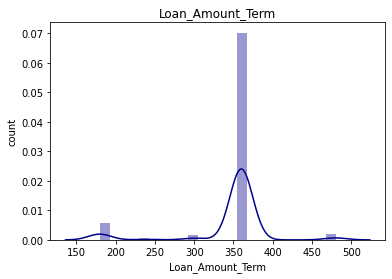

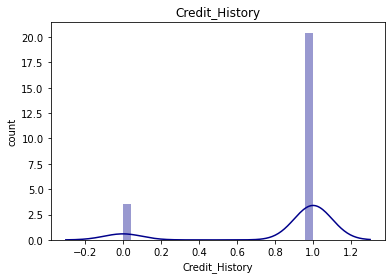

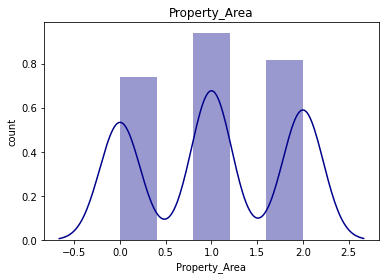

In [159]:
for feature in x_predictor :
    sns.distplot(x_predictor[feature] , kde = True , color = 'darkblue' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

Here we can observe that there is skewness in our dataset .

So we will use PowerTransformer for transforming/removing skewness from our dataset .

In [160]:
powert = PowerTransformer( method = 'yeo-johnson' , standardize = False)
x_t = powert.fit_transform(x_predictor)


In [161]:
x_trans = pd.DataFrame(x_t , columns = x_predictor.columns)
x_trans

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,24.870137,0.000000,-0.000000,-0.000000,-0.000000,11.194697,0.000000,13.201111,1.681817e+07,80.55264,1.690589
1,24.870137,2.081131,0.472409,-0.000000,-0.000000,10.799279,9.832468,12.482026,1.681817e+07,80.55264,0.000000
2,24.870137,2.081131,-0.000000,-0.000000,0.087923,10.125222,0.000000,9.390267,1.681817e+07,80.55264,1.690589
3,24.870137,2.081131,-0.000000,0.166246,-0.000000,9.891003,10.631416,12.148447,1.681817e+07,80.55264,1.690589
4,24.870137,0.000000,-0.000000,-0.000000,-0.000000,11.236333,0.000000,12.996190,1.681817e+07,80.55264,1.690589
...,...,...,...,...,...,...,...,...,...,...,...
572,0.000000,0.000000,-0.000000,-0.000000,-0.000000,10.071991,0.000000,9.697075,1.681817e+07,80.55264,0.000000
573,24.870137,2.081131,0.679867,-0.000000,-0.000000,10.622891,0.000000,7.486669,2.101446e+06,80.55264,0.000000
574,24.870137,2.081131,0.472409,-0.000000,-0.000000,11.725354,6.825818,16.498185,1.681817e+07,80.55264,1.690589
575,24.870137,2.081131,0.613735,-0.000000,-0.000000,11.621649,0.000000,14.599374,1.681817e+07,80.55264,1.690589


In [162]:
x_trans.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.405342
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.155094
dtype: float64

In our dataset there was categorical features also , so after conversion still they show a bit of skewness. Hence in here we need to focus on features naming -

Dependents , ApplicantIncome , CoapplicantIncome , LoanAmount , Loan_Amount_Term only .

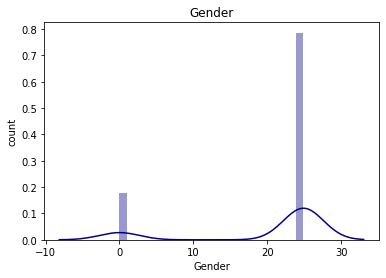

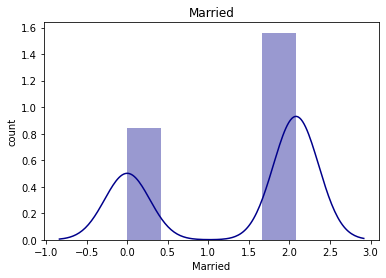

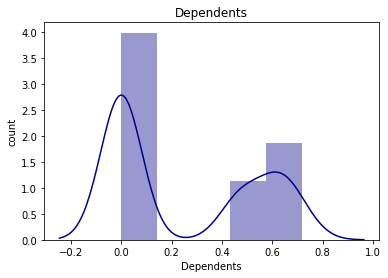

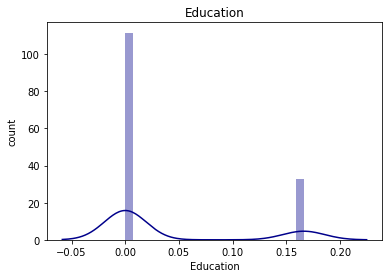

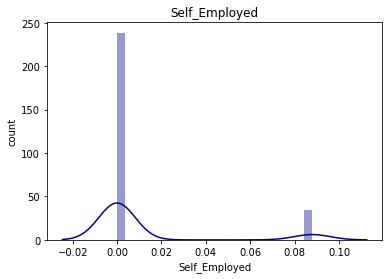

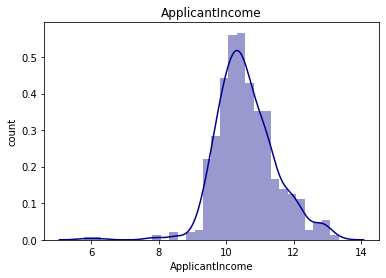

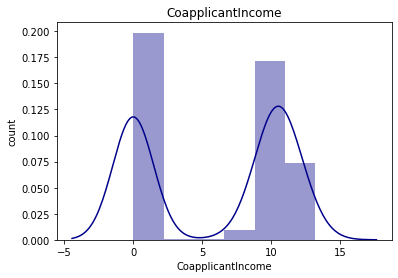

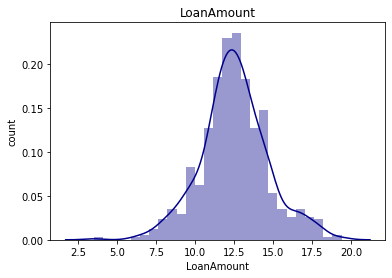

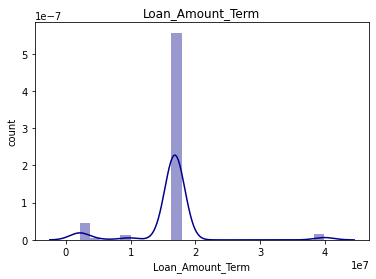

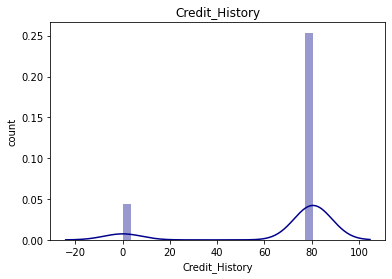

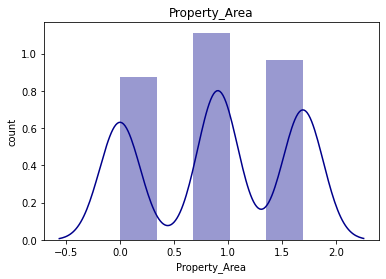

In [163]:
for feature in x_trans :
    sns.distplot(x_trans[feature] , kde = True , color = 'darkblue' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

From above we can observe that we have removed all the skewness from our dataset .

Standard Scaling

Gaussian's distribution with zero mean and unit variance is standard scaling.

In [164]:
for i in x_trans :
    print(i , max(x_trans[i]) - min(x_trans[i]))


Gender 24.87013733506448
Married 2.081131060180808
Dependents 0.7176728487809261
Education 0.1662459515553527
Self_Employed 0.08792340599638356
ApplicantIncome 7.529739652294087
CoapplicantIncome 13.193057655265918
LoanAmount 15.884284444447664
Loan_Amount_Term 37825086.25748738
Credit_History 80.5526400060219
Property_Area 1.6905889394348181


We can see that there is absorbable difference between values of different columns , So we will scale them .

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s


array([[ 0.47713685, -1.36251079, -0.84821559, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.7695393 , ...,  0.13078824,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.84821559, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.7695393 , ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.25350897, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.84821559, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [179]:
x_sc = pd.DataFrame(x_s , columns = x_trans.columns)
x_sc

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.848216,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.130788,0.418513,1.194806
1,0.477137,0.733939,0.769539,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.130788,0.418513,-1.340199
2,0.477137,0.733939,-0.848216,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.130788,0.418513,1.194806
3,0.477137,0.733939,-0.848216,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.130788,0.418513,1.194806
4,0.477137,-1.362511,-0.848216,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.130788,0.418513,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.848216,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.130788,0.418513,-1.340199
573,0.477137,0.733939,1.479978,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.562700,0.418513,-1.340199
574,0.477137,0.733939,0.769539,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.130788,0.418513,1.194806
575,0.477137,0.733939,1.253509,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.130788,0.418513,1.194806


<AxesSubplot:>

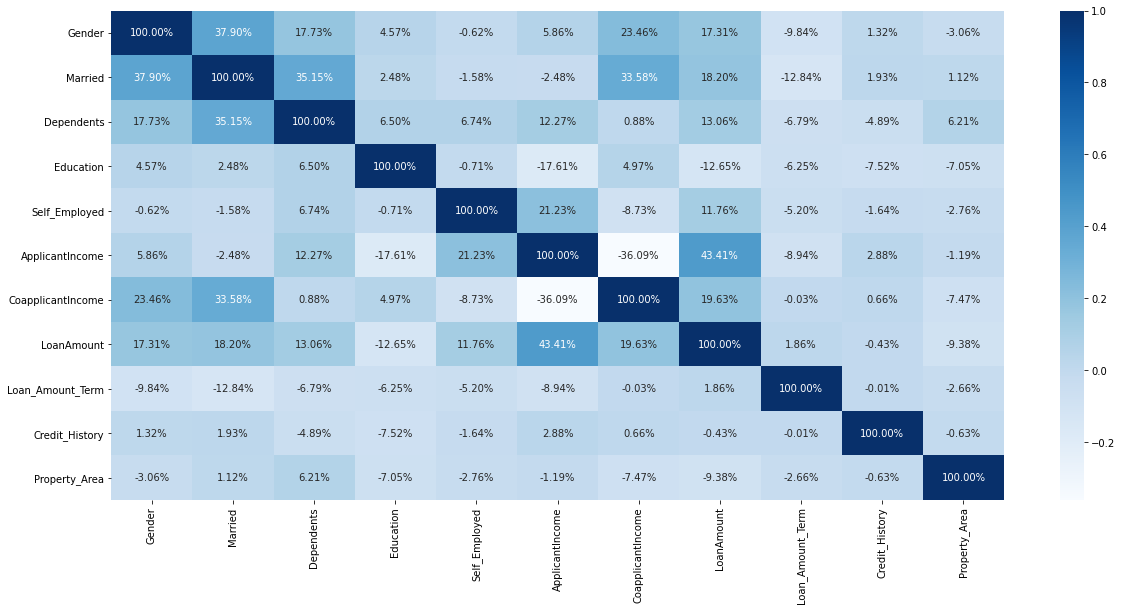

In [180]:
plt.figure(figsize= (20,9))
sns.heatmap(x_sc.corr() , cmap = 'Blues' , annot = True , fmt = '.2%')

From above we can observe that our predictor variables are not very much correlated with each other , so we will not require PCA for this.

This graph shows the importance of each feature for predicting target variable .



In [199]:
importances = pd.DataFrame({'feature':x_sc.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Credit_History,0.249
ApplicantIncome,0.210
LoanAmount,0.186
CoapplicantIncome,0.114
Property_Area,0.056
Dependents,0.053
Loan_Amount_Term,0.037
Education,0.032
Married,0.028


<AxesSubplot:xlabel='feature'>

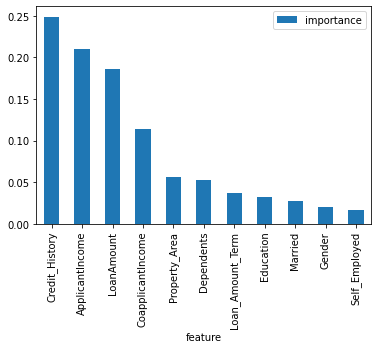

In [200]:
importances.plot.bar()

Credit_History has the highest importance in predicting Loan_Status.

Target Variable

In [201]:
y = df_wo.iloc[: , -1 :]

In [184]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# Machine Learning Models


Finding Best Random State

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf=rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.8793103448275862 on random state  39


# Training on different Classifier models

In [186]:
models = [LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             DecisionTreeClassifier(),
             GaussianNB()
         ]

names = ['LogisticRegression','K Nearest Neighbor','Support Vector Classifier','Random Forest','AdaBoost Classifier',
         'Decision Tree Classifier' , 'GaussianNB' ]

for model,name in zip(models,names):
    fit = model.fit(X_train , y_train)
    y_predicted = model.predict(X_test)
    score = model.score(X_train , y_train)
    print(name ," - " ,score)
    print("Accuracy:",accuracy_score(y_predicted, y_test))
    print("Confusion Matrix:\n",confusion_matrix(y_predicted, y_test))
    print("\t\tclassification report")
    print("-" * 52)
    print(classification_report(y_predicted , y_test))

LogisticRegression  -  0.8238213399503722
Accuracy: 0.8045977011494253
Confusion Matrix:
 [[ 22   2]
 [ 32 118]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.41      0.92      0.56        24
           1       0.98      0.79      0.87       150

    accuracy                           0.80       174
   macro avg       0.70      0.85      0.72       174
weighted avg       0.90      0.80      0.83       174

K Nearest Neighbor  -  0.8461538461538461
Accuracy: 0.7873563218390804
Confusion Matrix:
 [[ 23   6]
 [ 31 114]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.79      0.55        29
           1       0.95      0.79      0.86       145

    accuracy                           0.79       174
   macro avg       0.69      0.79      0.71       174
weighted avg       0.

From above we can observe that SVC and Random Forest has the best score and accuracy scores. So we will use only these models for our further predictions.

Support Vector Classifier (SVC)

In [187]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    sv = SVC()
    sv.fit(X_train,y_train)
    predsv = sv.predict(X_test)
    acc=accuracy_score(y_test,predsv)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.8908045977011494 on random state  12


In [188]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=12)
sv = SVC()
sv.fit(X_train , y_train)
sv_predicted = sv.predict(X_test)
score = sv.score(X_train , y_train)

print(SVC() ," - " ,score)
print("Accuracy:",accuracy_score(sv_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(sv_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(sv_predicted , y_test))


SVC()  -  0.8114143920595533
Accuracy: 0.8908045977011494
Confusion Matrix:
 [[ 24   1]
 [ 18 131]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.96      0.72        25
           1       0.99      0.88      0.93       149

    accuracy                           0.89       174
   macro avg       0.78      0.92      0.82       174
weighted avg       0.93      0.89      0.90       174



Random Forest Classsifier

In [189]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf = rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.8620689655172413 on random state  39


In [190]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=24)
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
rf_predicted = rf.predict(X_test)
score = rf.score(X_train , y_train)

print(RandomForestClassifier() ," - " ,score)
print("Accuracy:",accuracy_score(rf_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(rf_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(rf_predicted , y_test))


RandomForestClassifier()  -  1.0
Accuracy: 0.8390804597701149
Confusion Matrix:
 [[ 26   4]
 [ 24 120]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.87      0.65        30
           1       0.97      0.83      0.90       144

    accuracy                           0.84       174
   macro avg       0.74      0.85      0.77       174
weighted avg       0.89      0.84      0.85       174



From above we can find that Random Forest Classifier is giving the best accuracies .

# Training Random Forest Calssifier again

In [191]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=24)

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


Confusion Matrix

In [192]:
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 65,  64],
       [ 26, 248]], dtype=int64)

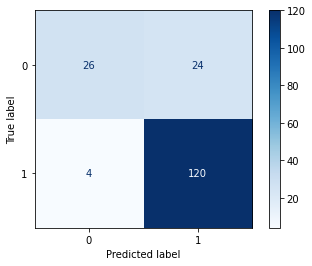

In [193]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf ,X_test , y_test , cmap = 'Blues' )

Precision and Recall

In [194]:
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7948717948717948
Recall: 0.9051094890510949


PLotting y_test and y_predicted for our datset .

>1, train: 0.734, test: 0.741
>2, train: 0.804, test: 0.851
>3, train: 0.804, test: 0.851
>4, train: 0.809, test: 0.851
>5, train: 0.819, test: 0.851
>6, train: 0.841, test: 0.845
>7, train: 0.866, test: 0.845
>8, train: 0.898, test: 0.845
>9, train: 0.938, test: 0.828
>10, train: 0.963, test: 0.839
>11, train: 0.978, test: 0.839
>12, train: 0.993, test: 0.839
>13, train: 0.998, test: 0.833
>14, train: 1.000, test: 0.839
>15, train: 1.000, test: 0.839
>16, train: 1.000, test: 0.845
>17, train: 1.000, test: 0.833
>18, train: 1.000, test: 0.856
>19, train: 1.000, test: 0.833
>20, train: 1.000, test: 0.839


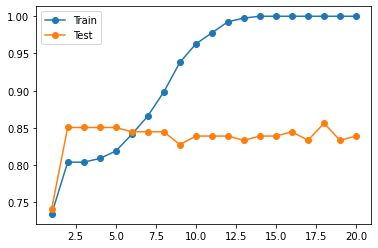

In [195]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:

    model = RandomForestClassifier(max_depth=i)
    
    model.fit(X_train, y_train)
   
    train_y_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train,train_y_pred)
    train_scores.append(train_accuracy)
   
    test_y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_accuracy)
    #printing test and accuracy scores.
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy, test_accuracy))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Getting the probabilities

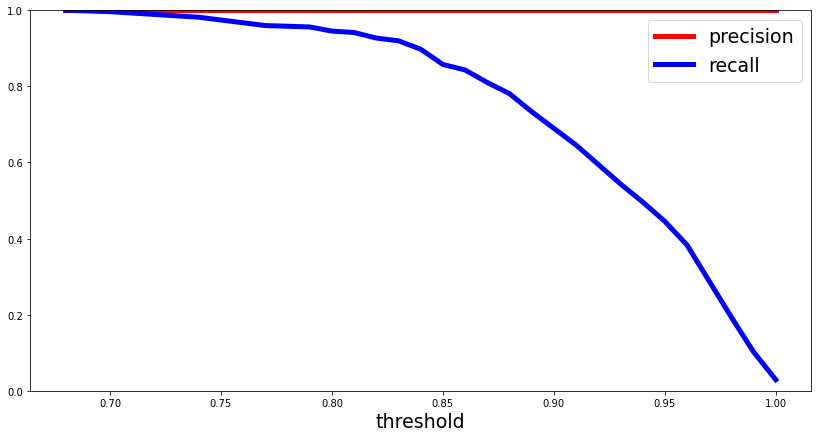

In [196]:
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

ROC_AUC Curve

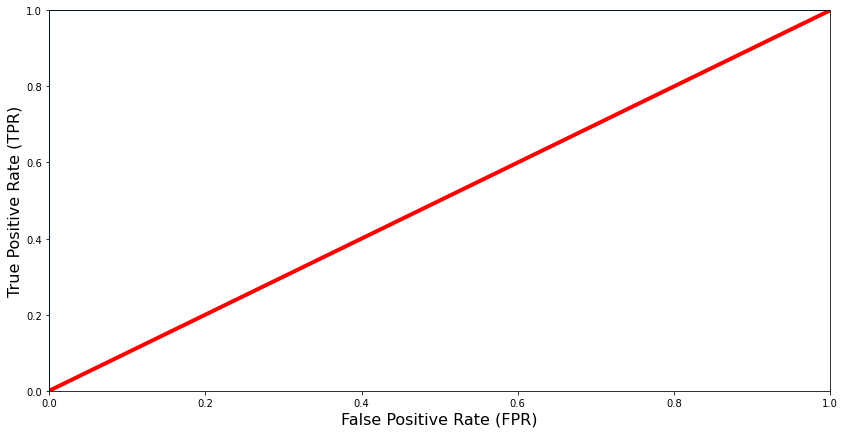

In [197]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [198]:
import joblib
joblib.dump(rf , 'RandomForestClassifier')


['RandomForestClassifier']